Importing pandas as well as Beautiful soup

In [91]:
import pandas as pd 
import requests 
from bs4 import BeautifulSoup 

Getting the response in the form of html, man in article said that response code 200 mean that it is ok to go ahead and download

In [92]:
wikiurl="https://en.wikipedia.org/wiki/List_of_United_States_cities_by_population"
table_class="wikitable sortable jquery-tablesorter"
response=requests.get(wikiurl)
print(response.status_code)

200


Parsing data from html into a beautifulsoup object, had to inspect table on site to find the class which was "wikitable sortable

In [93]:
soup = BeautifulSoup(response.text, 'html.parser')
table=soup.find('table',{'class':"wikitable sortable"})
table

<table class="wikitable sortable" style="text-align:center">
<tbody><tr>
<th scope="col">2021<br/>rank
</th>
<th scope="col">City
</th>
<th scope="col">State<sup class="reference" id="cite_ref-5"><a href="#cite_note-5">[c]</a></sup>
</th>
<th scope="col">2021<br/>estimate
</th>
<th scope="col">2020<br/>census
</th>
<th scope="col">Change
</th>
<th colspan="2" scope="col">2020 land area
</th>
<th colspan="2" scope="col">2020 population density
</th>
<th scope="col">Location
</th></tr>
<tr>
<th scope="row">1
</th>
<td style="text-align:left;background-color:#cfecec"><i><a href="/wiki/New_York_City" title="New York City">New York</a></i><sup class="reference" id="cite_ref-6"><a href="#cite_note-6">[d]</a></sup>
</td>
<td align="left"><a href="/wiki/New_York_(state)" title="New York (state)">New York</a>
</td>
<td style="text-align:right;">8,467,513
</td>
<td style="text-align:right;">8,804,190
</td>
<td style="text-align:right;"><span data-sort-value="2999618000000000000♠" style="display:

Converting list to a dataframe

In [94]:
df=pd.read_html(str(table))
df=pd.DataFrame(df[0])
print(df.head())

   2021rank         City    State[c]  2021estimate  2020census  Change  \
0         1  New York[d]    New York       8467513     8804190  −3.82%   
1         2  Los Angeles  California       3849297     3898747  −1.27%   
2         3      Chicago    Illinois       2696555     2746388  −1.81%   
3         4      Houston       Texas       2288250     2304580  −0.71%   
4         5      Phoenix     Arizona       1624569     1608139  +1.02%   

  2020 land area 2020 land area.1 2020 population density  \
0    300.5 sq mi        778.3 km2            29,298/sq mi   
1    469.5 sq mi      1,216.0 km2             8,304/sq mi   
2    227.7 sq mi        589.7 km2            12,061/sq mi   
3    640.4 sq mi      1,658.6 km2             3,599/sq mi   
4    518.0 sq mi      1,341.6 km2             3,105/sq mi   

  2020 population density.1                                           Location  
0                11,312/km2  .mw-parser-output .geo-default,.mw-parser-outp...  
1                 3,206/km

Dropping the unwanted columns, including the kilometer measurements of population density and land area

In [95]:
data = df.drop(["2021rank", "2021estimate","Change", "2020 population density.1", "2020 land area.1", "Location"], axis=1)

Fixing some of the column names to have proper spaces and capitalizations

In [96]:
data = data.rename(columns={"2020census": "2020 Census","2020 land area": "2020 Land Area in sq mi","2020 population density": "2020 Population Density in sq mi"})

In [97]:
data.head()

,City,State[c],2020 Census,2020 Land Area in sq mi,2020 Population Density in sq mi
0,New York[d],New York,8804190,300.5 sq mi,"29,298/sq mi"
1,Los Angeles,California,3898747,469.5 sq mi,"8,304/sq mi"
2,Chicago,Illinois,2746388,227.7 sq mi,"12,061/sq mi"
3,Houston,Texas,2304580,640.4 sq mi,"3,599/sq mi"
4,Phoenix,Arizona,1608139,518.0 sq mi,"3,105/sq mi"


In [98]:
print(data.head)

<bound method NDFrame.head of             City       State[c]  2020 Census 2020 Land Area in sq mi  \
0    New York[d]       New York      8804190             300.5 sq mi   
1    Los Angeles     California      3898747             469.5 sq mi   
2        Chicago       Illinois      2746388             227.7 sq mi   
3        Houston          Texas      2304580             640.4 sq mi   
4        Phoenix        Arizona      1608139             518.0 sq mi   
..           ...            ...          ...                     ...   
326         Lynn  Massachusetts       101253              10.7 sq mi   
327       Carmel        Indiana        99757              49.1 sq mi   
328     Longmont       Colorado        98885              28.8 sq mi   
329   Tuscaloosa        Alabama        99600              61.9 sq mi   
330      Norwalk     California       102773               9.7 sq mi   

    2020 Population Density in sq mi  
0                       29,298/sq mi  
1                        8,

Make the dataframe reflect the processed data 

In [99]:
df = pd.DataFrame(data) 

In [100]:
print(df)

            City       State[c]  2020 Census 2020 Land Area in sq mi  \
0    New York[d]       New York      8804190             300.5 sq mi   
1    Los Angeles     California      3898747             469.5 sq mi   
2        Chicago       Illinois      2746388             227.7 sq mi   
3        Houston          Texas      2304580             640.4 sq mi   
4        Phoenix        Arizona      1608139             518.0 sq mi   
..           ...            ...          ...                     ...   
326         Lynn  Massachusetts       101253              10.7 sq mi   
327       Carmel        Indiana        99757              49.1 sq mi   
328     Longmont       Colorado        98885              28.8 sq mi   
329   Tuscaloosa        Alabama        99600              61.9 sq mi   
330      Norwalk     California       102773               9.7 sq mi   

    2020 Population Density in sq mi  
0                       29,298/sq mi  
1                        8,304/sq mi  
2                 

Remove the strings of "sq mi" in columns and change the column values from strings to integers

In [101]:
df['2020 Land Area in sq mi'] = df['2020 Land Area in sq mi'].str.replace('\D', '', regex=True)

In [102]:
df[["2020 Land Area in sq mi"]] = df[["2020 Land Area in sq mi"]].apply(pd.to_numeric)

In [103]:
df['2020 Population Density in sq mi'] = df['2020 Population Density in sq mi'].str.replace('\D', '', regex=True)

In [104]:
df[["2020 Population Density in sq mi"]] = df[["2020 Population Density in sq mi"]].apply(pd.to_numeric)

In [105]:
print(df)

            City       State[c]  2020 Census  2020 Land Area in sq mi  \
0    New York[d]       New York      8804190                     3005   
1    Los Angeles     California      3898747                     4695   
2        Chicago       Illinois      2746388                     2277   
3        Houston          Texas      2304580                     6404   
4        Phoenix        Arizona      1608139                     5180   
..           ...            ...          ...                      ...   
326         Lynn  Massachusetts       101253                      107   
327       Carmel        Indiana        99757                      491   
328     Longmont       Colorado        98885                      288   
329   Tuscaloosa        Alabama        99600                      619   
330      Norwalk     California       102773                       97   

     2020 Population Density in sq mi  
0                               29298  
1                                8304  
2  

In [106]:
df.to_csv('ListofUSCitiesbyPopulation.csv')

In [107]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, "Top US Cities' population in millions ")

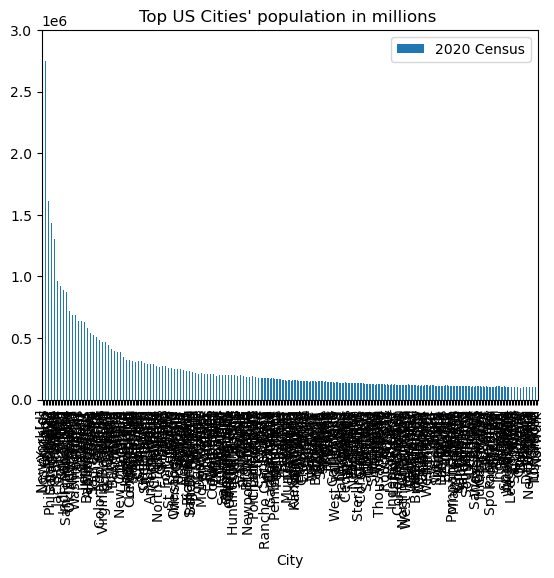

In [112]:
df.plot(x='City', y='2020 Census', kind='bar')
plt.ylim(0,3000000)
plt.title("Top US Cities' population in millions ")

This graph (though extremely ugly, I am very sorry about the X-axis labels...) shows how drastic the drop in population among the top 331 cities in the US is. The top few are extreme but the population of these top cities tapers off quite quickly as one moves down the ranks

Text(0.5, 1.0, 'Land Area compared to Population')

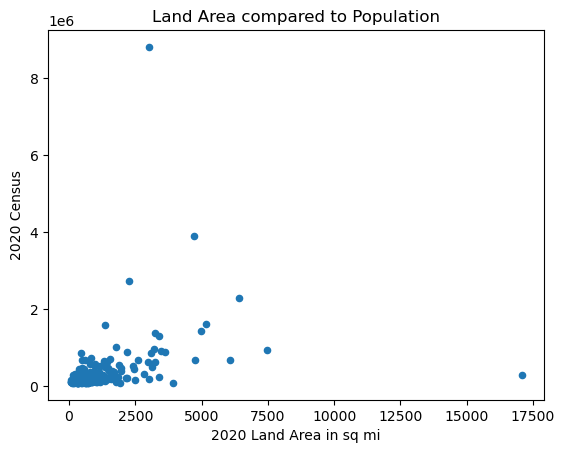

In [113]:
df.plot(x='2020 Land Area in sq mi', y='2020 Census', kind='scatter')
plt.title("Land Area compared to Population")

This graph is meant to shows that usually, the less land area that the city possesses, the less the population is. Some of the outliers represent the more densely packed cities, while the one to the very right represents one city with a very large land area. Most of the  cities within the dataset have a land area under 2500 square miles.

Text(0.5, 1.0, 'Top 5 most populated cities in the United States')

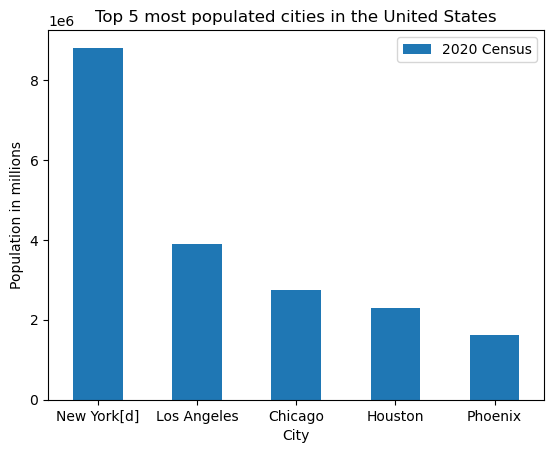

In [114]:
top5df = pd.DataFrame({'City':['New York[d]', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix'], '2020 Census':[8804190, 3898747, 2746388, 2304580, 1608139]})
ax = top5df.plot.bar(x='City', y='2020 Census', rot=0)
plt.ylabel("Population in millions")
plt.title("Top 5 most populated cities in the United States")


This graph shows the population in millions of the top 5 cities in the dataset, therefore the top 5 most populated cities in the US. This graph makes it quite obvious how much of an outlier New York City is and how drastically the population starts to drop in the beginning of the rankings.

Sources:
Dataset source: https://en.wikipedia.org/wiki/List_of_United_States_cities_by_population
Some code source via article: https://medium.com/analytics-vidhya/web-scraping-a-wikipedia-table-into-a-dataframe-c52617e1f451
        